In [ ]:
!pip uninstall pandas
!pip install pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Análisis exploratorio de Datos

## 1.1.  Cargar y visualizar el dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

In [2]:
# Cargar los datos
df = pd.read_csv('Gestantes Huancavelica.csv')

In [3]:
df = df[df['Departamento'] == 'HUANCAVELICA'].copy()

In [4]:
df.replace(['', ' ', '--', 'NA', 'N/A'], np.nan, inplace=True)

In [5]:
# Mostrar primeras filas del dataset
print("Primeras filas del dataset:")
display(df.head())

Primeras filas del dataset:


,sw,Diresa,Red,Microred,EESS,Renipress,Edad,Fur,Peso,Talla,...,fecha_nacimiento,mes,dias,año,UbigeoREN,DepartamentoREN,ProvinciaREN,DistritoREN,AlturaREN,Dx_CLAP
0,1,HUANCAVELICA,ANGARAES,NO PERTENECE A NINGUNA MICRORED,II-1 - 00003943 - HOSPITAL DE LIRCAY,3943,17,25/11/2024,45.0,142.0,...,11/24/2007,12,26,2024,90301,HUANCAVELICA,ANGARAES,LIRCAY,3278,Normal
1,1,HUANCAVELICA,HUANCAVELICA,SANTA ANA,I-3 - 00003859 - SANTA ANA,3859,36,15/09/2024,58.0,143.0,...,1/20/1988,12,19,2024,90101,HUANCAVELICA,HUANCAVELICA,HUANCAVELICA,3660,Sobrepeso
2,1,HUANCAVELICA,ANGARAES,CCOCHACCASA,I-3 - 00006901 - BUENOS AIRES DE PARCO CHACA...,6901,14,21/12/2023,44.2,145.5,...,11/23/2009,3,27,2024,90302,HUANCAVELICA,ANGARAES,ANCHONGA,3298,Normal
3,1,HUANCAVELICA,CHURCAMPA,CHURCAMPA,I-2 - 00003897 - COSME,3897,14,3/09/2024,45.0,144.0,...,1/1/2010,12,3,2024,90511,HUANCAVELICA,CHURCAMPA,COSME,3490,Normal
4,1,HUANCAVELICA,HUANCAVELICA,MOYA,I-3 - 00003910 - VIÑAS,3910,41,14/09/2024,63.0,147.0,...,3/29/1983,12,15,2024,90102,HUANCAVELICA,HUANCAVELICA,ACOBAMBILLA,3795,Sobrepeso


In [6]:
print("Dimensiones:", df.shape)

Dimensiones: (4610, 33)


In [7]:
# Mostrar nombres de columnas
print(" Columnas disponibles:")
print(df.columns.tolist())

 Columnas disponibles:
['sw', 'Diresa', 'Red', 'Microred', 'EESS', 'Renipress', 'Edad', 'Fur', 'Peso', 'Talla', 'Ppg', 'Edad_Gest', 'Tipo_Embarazo', 'Ubigeo', 'Departamento', 'Provincia', 'Distrito', 'Localidad', 'Altitud_Loc', 'Hemoglobina', 'FechaHemoglobina', 'pais', 'atencion_fecha', 'fecha_nacimiento', 'mes', 'dias', 'año', 'UbigeoREN', 'DepartamentoREN', 'ProvinciaREN', 'DistritoREN', 'AlturaREN', 'Dx_CLAP']


In [8]:
cols = ['Provincia','Edad', 'Ppg', 'Peso', 'Talla', 'Edad_Gest', 'AlturaREN', 'Dx_CLAP']
df = df[cols]
print("Dimensiones:", df.shape)

Dimensiones: (4610, 8)


## 1.2 Detección y tratamiento de valores faltantes

In [9]:
# Ver cantidad de valores faltantes por columna
print("\nValores faltantes por columna:")
print(df.isnull().sum())



Valores faltantes por columna:
Provincia      0
Edad           0
Ppg          857
Peso           0
Talla          0
Edad_Gest      0
AlturaREN      0
Dx_CLAP        0
dtype: int64


In [10]:
# Cuantitativas a imputar con la media (excluyendo AlturaREN y Hemoglobina)
cuantis_a_imputar = ['Edad', 'Ppg', 'Peso', 'Talla', 'Edad_Gest']
for col in cuantis_a_imputar:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].mean(), inplace=True)


In [11]:
# Ver cantidad de valores faltantes por columna
print("\nValores faltantes por columna:")
print(df.isnull().sum())



Valores faltantes por columna:
Provincia    0
Edad         0
Ppg          0
Peso         0
Talla        0
Edad_Gest    0
AlturaREN    0
Dx_CLAP      0
dtype: int64


In [12]:
df = df[df['Provincia'].notna()]
print(df.isnull().sum())

Provincia    0
Edad         0
Ppg          0
Peso         0
Talla        0
Edad_Gest    0
AlturaREN    0
Dx_CLAP      0
dtype: int64


In [13]:
print("Dimensiones:", df.shape)

Dimensiones: (4610, 8)


## 1.3  Información general del dataset

In [14]:
# Ver estructura general
print("\nEstructura general: \n")
print(df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas: \n")
print(df.describe(include='all'))


Estructura general: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4610 entries, 0 to 4862
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Provincia  4610 non-null   object 
 1   Edad       4610 non-null   int64  
 2   Ppg        4610 non-null   float64
 3   Peso       4610 non-null   float64
 4   Talla      4610 non-null   float64
 5   Edad_Gest  4610 non-null   int64  
 6   AlturaREN  4610 non-null   int64  
 7   Dx_CLAP    4610 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 324.1+ KB
None

Estadísticas descriptivas: 

           Provincia         Edad          Ppg         Peso        Talla  \
count           4610  4610.000000  4610.000000  4610.000000  4610.000000   
unique             7          NaN          NaN          NaN          NaN   
top     HUANCAVELICA          NaN          NaN          NaN          NaN   
freq            1531          NaN          NaN          NaN         

## 1.4  Separación de variables en cualitativas y cuantitativas

In [15]:
# Lista de variables cuantitativas
variables_cuantitativas = ['Edad', 'Ppg', 'Peso', 'Talla', 'Edad_Gest', 'AlturaREN']
df_cuantis = df[variables_cuantitativas]
print("Dimensiones - Cuantitativas:", df_cuantis.shape)

Dimensiones - Cuantitativas: (4610, 6)


In [16]:
# Lista de variables cualitativas
variables_cualitativas = ['Provincia', 'Dx_CLAP']  # incluye también el target
df_cualis = df[variables_cualitativas]
print("Dimensiones - Cualitativas:", df_cualis.shape)

Dimensiones - Cualitativas: (4610, 2)


## 1.5 Análisis univariado

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# Convertir numéricas a formato largo y agregar la variable target
df_num = df[variables_cuantitativas].copy()
df_num['Dx_CLAP'] = df['Dx_CLAP']
df_num = df_num.melt(id_vars='Dx_CLAP', var_name='variable', value_name='value')

# Convertir categóricas a formato largo y agregar la variable target
df_cat = df[variables_cualitativas].copy()
df_cat['Dx_CLAP'] = df['Dx_CLAP']
df_cat = df_cat.melt(id_vars='Dx_CLAP', var_name='variable', value_name='value')

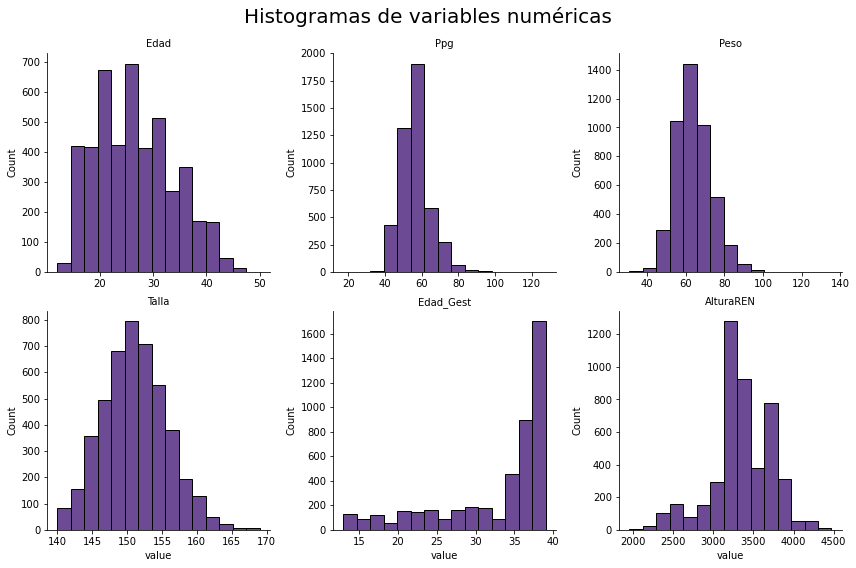

In [19]:
g = sns.FacetGrid(df_num, col="variable", col_wrap=3, sharex=False, sharey=False, height=4)
g.map_dataframe(sns.histplot, x="value", bins=15, color="#3B0F70")  # tono de la paleta magma
g.fig.subplots_adjust(top=0.9)
g.set_titles("{col_name}")
g.fig.suptitle("Histogramas de variables numéricas", fontsize=20)
plt.show()

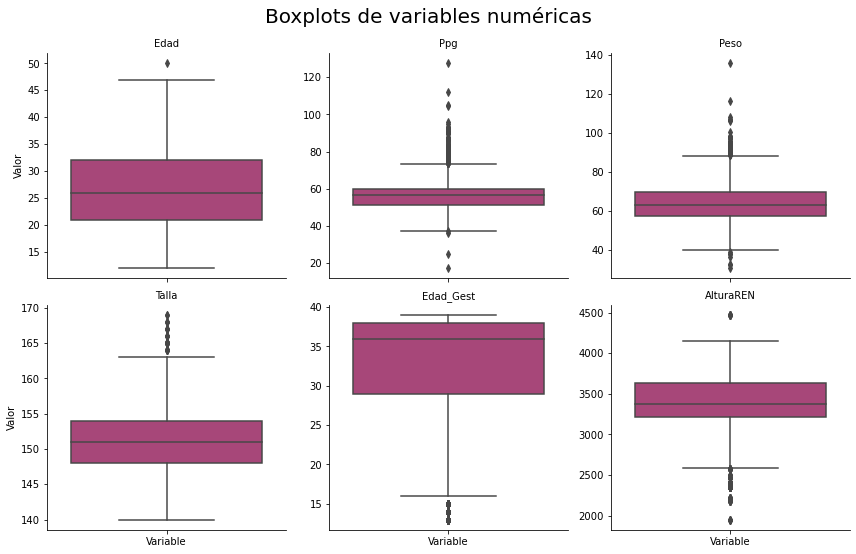

In [20]:
# Boxplots en formato largo
df_num["x"] = "Variable"
g = sns.catplot(
    data=df_num, x="x", y="value",
    kind="box", col="variable", col_wrap=3,
    sharey=False, height=4, palette="magma"
)

g.set_titles("{col_name}")
g.set_axis_labels("", "Valor")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Boxplots de variables numéricas", fontsize=20)
plt.show()

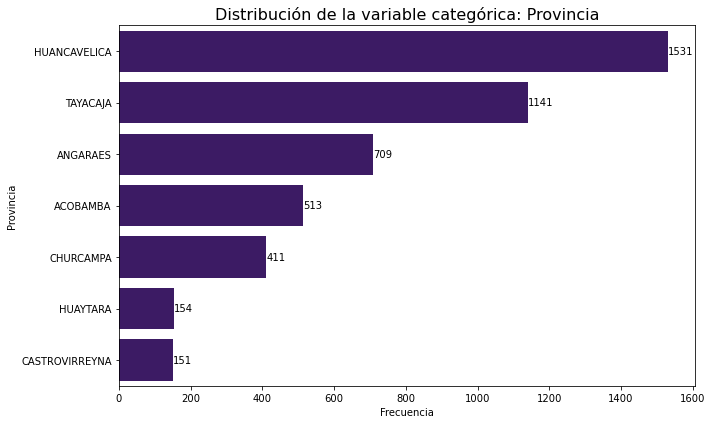

In [21]:
plt.figure(figsize=(10, 6))
orden = df['Provincia'].value_counts().index  # Ordenar por frecuencia
ax = sns.countplot(data=df, y='Provincia', order=orden, color="#3B0F70")
# Agregar etiquetas a las barras
for p in ax.patches:
    frecuencia = int(p.get_width())
    ax.text(p.get_width() ,  # desplazamiento a la derecha
            p.get_y() + p.get_height() / 2,
            frecuencia,
            va='center')
plt.title("Distribución de la variable categórica: Provincia", fontsize=16)
plt.xlabel("Frecuencia")
plt.ylabel("Provincia")
plt.tight_layout()
plt.show()

## 1.6 Análisis Multivariado

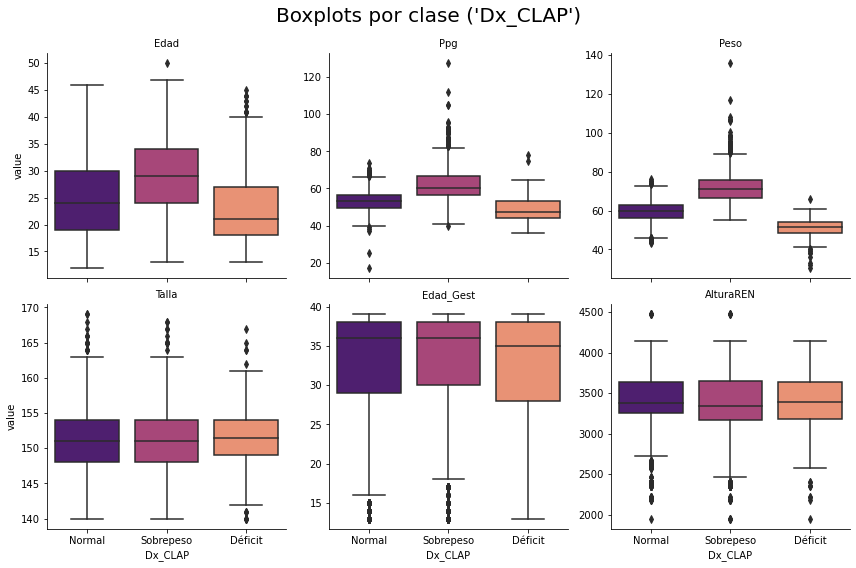

In [22]:
# Boxplots por clase
g = sns.catplot(data=df_num, x='Dx_CLAP', y="value", col="variable", kind="box",
                col_wrap=3, sharey=False, height=4, palette="magma")
g.fig.subplots_adjust(top=0.9)
g.set_titles("{col_name}")
g.fig.suptitle("Boxplots por clase ('Dx_CLAP')", fontsize=20)
plt.show()


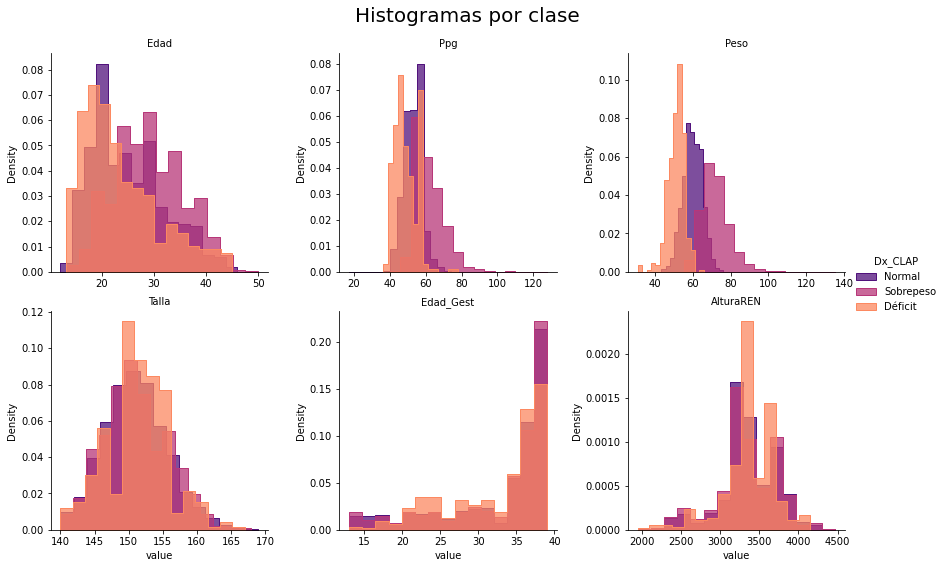

In [23]:
# Histogramas por clase (superpuestos)
g = sns.FacetGrid(df_num, col="variable", col_wrap=3, height=4, sharex=False, sharey=False, hue='Dx_CLAP', palette="magma")
g.map_dataframe(sns.histplot, x="value", bins=15, element="step", stat="density", common_norm=False, multiple="dodge")
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.set_titles("{col_name}")
g.fig.suptitle("Histogramas por clase", fontsize=20)
plt.show()

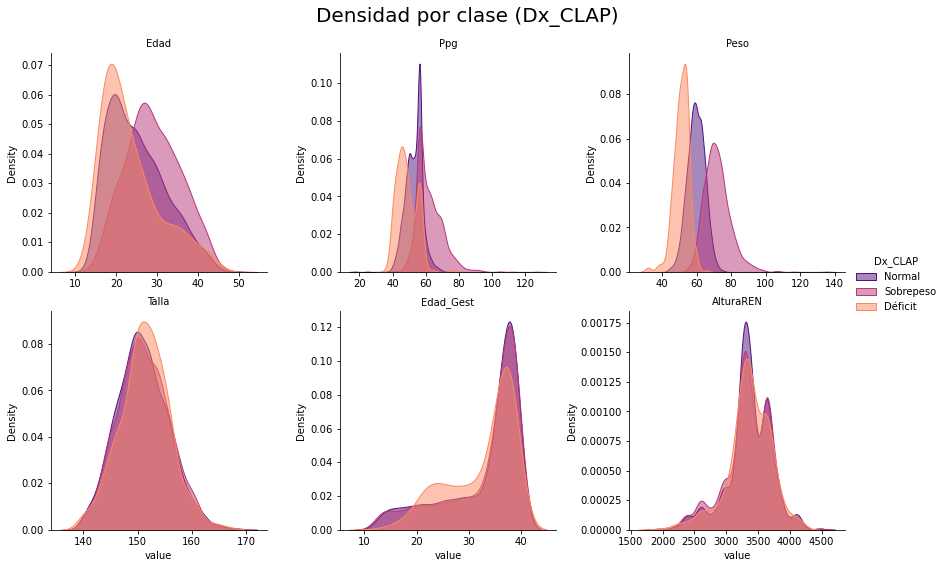

In [24]:
# Densidades por clase
g = sns.FacetGrid(df_num, col="variable", col_wrap=3, height=4, sharex=False, sharey=False, hue='Dx_CLAP', palette="magma")
g.map_dataframe(sns.kdeplot, x="value", fill=True, alpha=0.5)
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.set_titles("{col_name}")
g.fig.suptitle("Densidad por clase (Dx_CLAP)", fontsize=20)
plt.show()

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

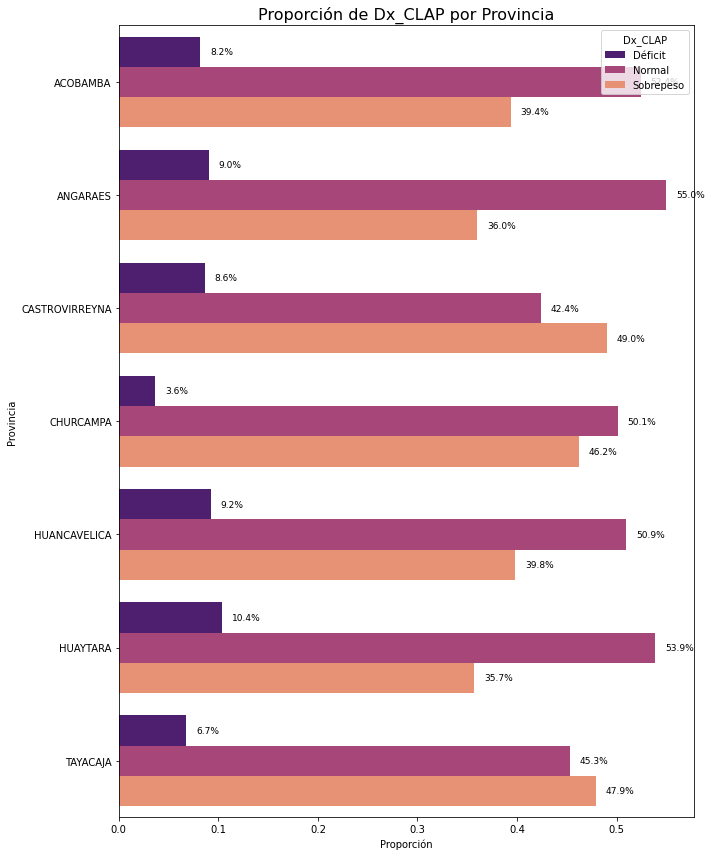

In [26]:
# Crear tabla de proporciones
# Crear tabla de proporciones
df_prop = (
    df.groupby(['Provincia', 'Dx_CLAP']).size()
    .groupby(level=0).transform(lambda x: x / x.sum())
    .reset_index(name='Proporcion')
)

df_prop['Porcentaje'] = df_prop['Proporcion'] * 100

plt.figure(figsize=(10, 12))
barplot = sns.barplot(
    data=df_prop,
    y='Provincia',
    x='Proporcion',
    hue='Dx_CLAP',
    palette='magma'
)

for p in barplot.patches:
    width = p.get_width()
    if width > 0.01:
        x_pos = p.get_x() + p.get_width()
        y_pos = p.get_y() + p.get_height() / 2
        barplot.annotate(f'{width*100:.1f}%',
                         (x_pos + 0.01, y_pos),
                         ha='left', va='center', fontsize=9, color='black')

plt.title('Proporción de Dx_CLAP por Provincia', fontsize=16)
plt.xlabel('Proporción')
plt.ylabel('Provincia')
plt.legend(title='Dx_CLAP', loc='upper right')
plt.tight_layout()
plt.show()

## 1.7 Análisis del target

In [27]:
df['Dx_CLAP'] = df['Dx_CLAP'].astype('category')

In [28]:
print("\nDistribución de la variable objetivo (Dx_CLAP):")
print(df['Dx_CLAP'].value_counts())

print("\nProporción de clases:")
print(df['Dx_CLAP'].value_counts(normalize=True))



Distribución de la variable objetivo (Dx_CLAP):
Normal       2309
Sobrepeso    1933
Déficit       368
Name: Dx_CLAP, dtype: int64

Proporción de clases:
Normal       0.500868
Sobrepeso    0.419306
Déficit      0.079826
Name: Dx_CLAP, dtype: float64


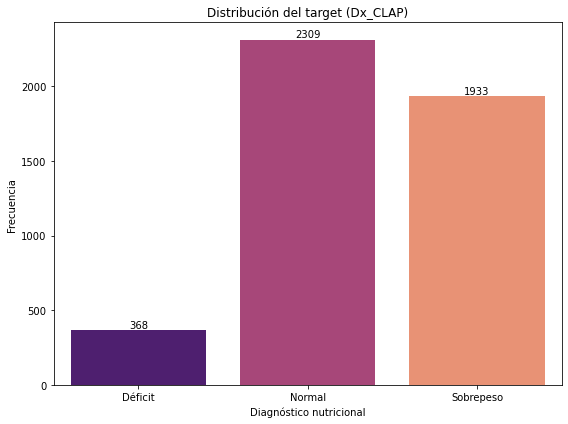

In [29]:
# Visualización de la variable objetivo
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Dx_CLAP', palette='magma')

plt.title('Distribución del target (Dx_CLAP)')
plt.xlabel("Diagnóstico nutricional")
plt.ylabel("Frecuencia")

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height ),
                ha='center', va='bottom', fontsize=10)

ax.set_xticks(range(len(df['Dx_CLAP'].cat.categories)))
ax.set_xticklabels(df['Dx_CLAP'].cat.categories)

plt.tight_layout()
plt.show()

## 1.8. Visualización de relaciones entre variables

In [30]:
# Estadísticas de AlturaREN por Departamento
stats_altura = df.groupby("Provincia")["AlturaREN"].agg(['mean', 'std', 'min', 'max'])
display(stats_altura)

,mean,std,min,max
Provincia,,,,
ACOBAMBA,3591.771930,196.158559,2404,4473
ANGARAES,3386.873061,247.168629,2771,4150
CASTROVIRREYNA,3366.960265,603.699052,2184,4473
CHURCAMPA,3128.985401,401.530426,2212,3806
HUANCAVELICA,3480.442848,223.574157,2658,4473
HUAYTARA,3322.220779,641.396916,1950,4092
TAYACAJA,3109.040316,339.156092,2350,3840


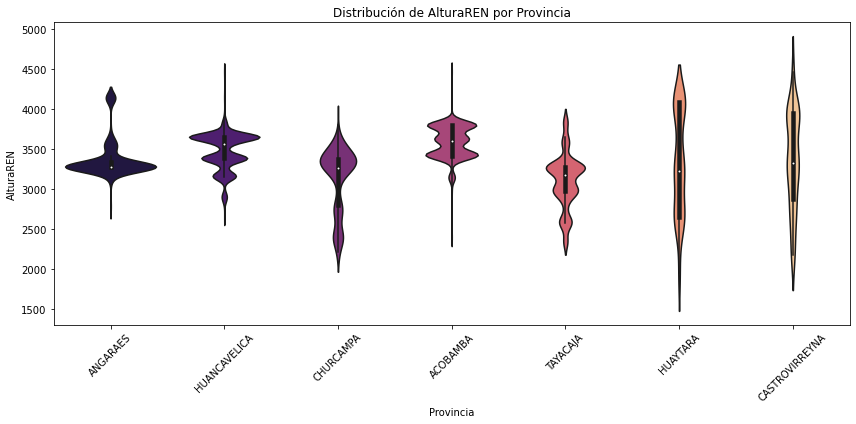

In [31]:
# Diagrama de violín para ver distribución de alturas por Provincia
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x="Provincia", y="AlturaREN", palette="magma")
plt.xticks(rotation=45)
plt.title("Distribución de AlturaREN por Provincia")
plt.tight_layout()
plt.show()

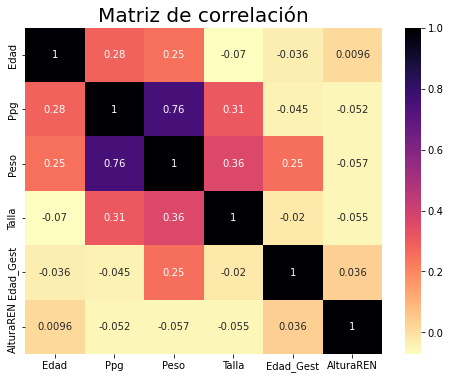

In [32]:
# Correlación entre variables numéricas
plt.figure(figsize=(8,6))
sns.heatmap(df[variables_cuantitativas].corr(), annot=True, cmap='magma_r')
plt.title("Matriz de correlación", fontsize=20)
plt.show()

## 1.9 Muestreo Estratificado

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# Tamaño de la muestra deseado (por ejemplo, 20% del total original)
tamanio_muestra = 0.20

In [35]:
# Realizar muestreo estratificado sobre el Provincia
df_muestra, _ = train_test_split(
    df,
    test_size=(1 - tamanio_muestra),
    stratify=df['Provincia'],
    random_state=42
)

# Verificación de la muestra
print("Tamaño total original:", df.shape[0])
print("Tamaño de la muestra estratificada:", df_muestra.shape[0])
print("\nFrecuencia relativa por Provincia (original vs muestra):")
comparacion = pd.DataFrame({
    "Original": df['Provincia'].value_counts(normalize=True).sort_index(),
    "Muestra": df_muestra['Provincia'].value_counts(normalize=True).sort_index()
})
display(comparacion)

Tamaño total original: 4610
Tamaño de la muestra estratificada: 922

Frecuencia relativa por Provincia (original vs muestra):


,Original,Muestra
ACOBAMBA,0.111280,0.111714
ANGARAES,0.153796,0.154013
CASTROVIRREYNA,0.032755,0.032538
CHURCAMPA,0.089154,0.088937
HUANCAVELICA,0.332104,0.331887
HUAYTARA,0.033406,0.033623
TAYACAJA,0.247505,0.247289


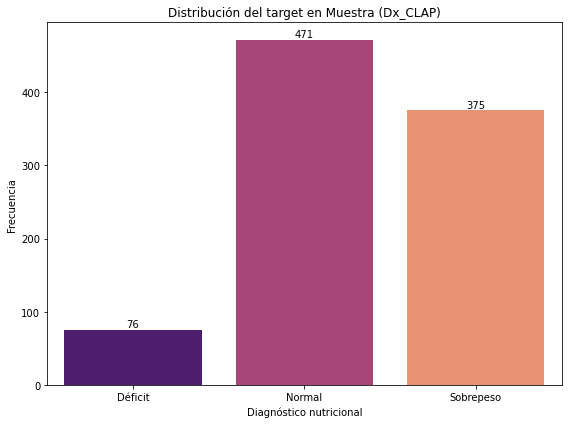

In [36]:
# Visualización de la variable objetivo
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_muestra, x='Dx_CLAP', palette='magma')

plt.title('Distribución del target en Muestra (Dx_CLAP)')
plt.xlabel("Diagnóstico nutricional")
plt.ylabel("Frecuencia")

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

ax.set_xticks(range(len(df['Dx_CLAP'].cat.categories)))
ax.set_xticklabels(df['Dx_CLAP'].cat.categories)

plt.tight_layout()
plt.show()

## 1.10 Balanceo del Target

In [42]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder

# Codificar el target
le = LabelEncoder()
y = le.fit_transform(df_muestra['Dx_CLAP'])

# Variables predictoras (excluyendo el target)
X = df_muestra.drop(columns=['Dx_CLAP'])

# Aplicar sobremuestreo
ros = RandomOverSampler(random_state=42)
X_bal, y_bal = ros.fit_resample(X, y)

C:\Users\Geraldine\anaconda3\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\Geraldine\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [41]:
pip install imblearn

In [43]:
# Reconstruir DataFrame balanceado
# Convertimos el target a etiquetas originales
y_bal_labels = le.inverse_transform(y_bal)

# Creamos el nuevo DataFrame balanceado
df_bal = X_bal.copy()
df_bal['Dx_CLAP'] = y_bal_labels


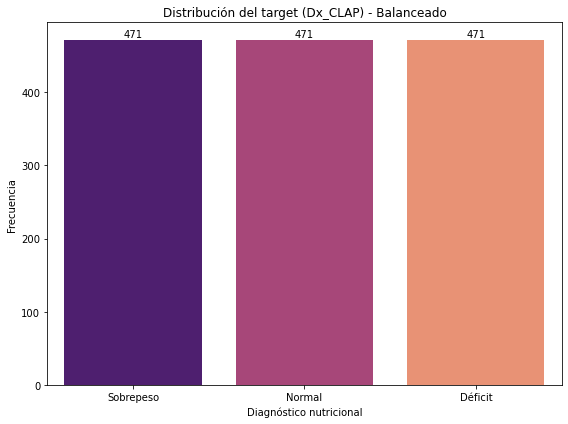

In [44]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_bal, x='Dx_CLAP', palette='magma')
plt.title('Distribución del target (Dx_CLAP) - Balanceado')
plt.xlabel("Diagnóstico nutricional")
plt.ylabel("Frecuencia")

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Modelado y Evaluación

Partición en conjunto de entrenamiento y prueba

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
# Definir las variables de entrada
variables_cuantitativas = ['Edad', 'Ppg', 'Peso', 'Talla', 'Edad_Gest', 'AlturaREN']
variables_cualitativas = ['Provincia']

# Separar variables predictoras y target
X = df_bal[variables_cuantitativas + variables_cualitativas]
y = df_bal['Dx_CLAP']


In [47]:
print(df_bal.columns.tolist())

['Provincia', 'Edad', 'Ppg', 'Peso', 'Talla', 'Edad_Gest', 'AlturaREN', 'Dx_CLAP']


In [48]:
#One-hot encoding para variables categóricas (Departamento)
X = pd.get_dummies(X, columns=variables_cualitativas, drop_first=True)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
# Verificar dimensiones
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (1130, 12)
Tamaño del conjunto de prueba: (283, 12)


## 2.2 RNN con MLPClassifier

### Ajuste de hiperparametos

In [50]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


In [51]:
# Codificar target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Definir grilla de hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(32, 32), (64, 64)],  # capas y neuronas
    'activation': ['relu', 'tanh'],  # función de activación
    'solver': ['adam'],  # optimizador (adam permite mini-batch)
    'alpha': [0.0001, 0.001],  # regularización L2
    'learning_rate': ['constant', 'adaptive'],  # tasa de aprendizaje
    'max_iter': [100,200]  # aproximación a “épocas”
}

In [52]:
# Crear modelo base
mlp = MLPClassifier(random_state=42)

# Búsqueda con validación cruzada
grid_search_mlp = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    return_train_score=True
)

grid_search_mlp.fit(X_train, y_train)

# Resultados en un DataFrame
results_mlp = pd.DataFrame(grid_search_mlp.cv_results_)

In [53]:
# Seleccionar columnas importantes
summary_mlp = results_mlp[[
    'param_hidden_layer_sizes',
    'param_activation',
    'param_alpha',
    'param_learning_rate',
    'param_max_iter',
    'mean_test_score'
]].sort_values(by='mean_test_score', ascending=False)

# Renombrar columnas para presentación
summary_mlp.columns = [
    'Capas ocultas',
    'Función de activación',
    'Alpha',
    'Tasa de aprendizaje',
    'Épocas (max_iter)',
    'Precisión promedio'
]

# Mostrar resumen
print("Resultados del ajuste de hiperparámetros para MLPClassifier:")
display(summary_mlp)

Resultados del ajuste de hiperparámetros para MLPClassifier:


,Capas ocultas,Función de activación,Alpha,Tasa de aprendizaje,Épocas (max_iter),Precisión promedio
27,"(32, 32)",tanh,0.0010,adaptive,200,0.811492
25,"(32, 32)",tanh,0.0010,constant,200,0.811492
26,"(32, 32)",tanh,0.0010,adaptive,100,0.810608
24,"(32, 32)",tanh,0.0010,constant,100,0.810608
30,"(64, 64)",tanh,0.0010,adaptive,100,0.805315
28,"(64, 64)",tanh,0.0010,constant,100,0.805315
16,"(32, 32)",tanh,0.0001,constant,100,0.783149
18,"(32, 32)",tanh,0.0001,adaptive,100,0.783149
29,"(64, 64)",tanh,0.0010,constant,200,0.780476
31,"(64, 64)",tanh,0.0010,adaptive,200,0.780476


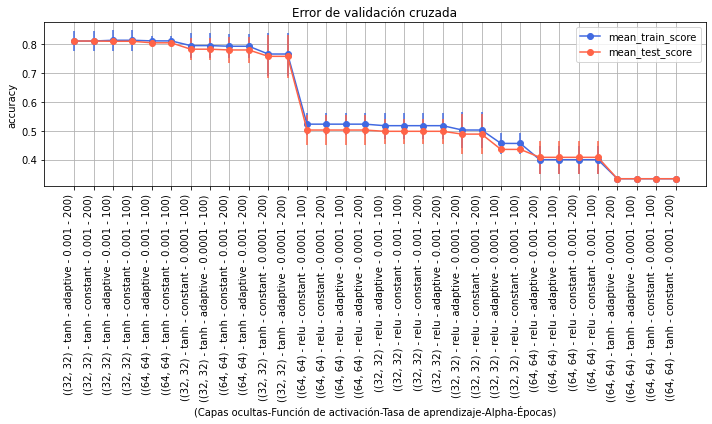

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

results_mlp['config'] = (
    '(' + results_mlp['param_hidden_layer_sizes'].astype(str) +
    ' - ' + results_mlp['param_activation'].astype(str) +
    ' - ' + results_mlp['param_learning_rate'].astype(str) +
    ' - ' + results_mlp['param_alpha'].astype(str) +
    ' - ' + results_mlp['param_max_iter'].astype(str) + ')'
)
results_mlp = results_mlp.sort_values(by='mean_test_score', ascending=False).reset_index(drop=True)


# Crear gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar precisión promedio en entrenamiento
results_mlp.plot(
    x='config',
    y='mean_train_score',
    yerr='std_train_score',
    ax=ax,
    label='mean_train_score',
    fmt='-o',
    color='royalblue'
)

# Graficar precisión promedio en validación
results_mlp.plot(
    x='config',
    y='mean_test_score',
    yerr='std_test_score',
    ax=ax,
    label='mean_test_score',
    fmt='-o',
    color='tomato'
)

# Ajustes de estilo
ax.set_xticks(np.arange(len(results_mlp['config'])))
ax.set_xticklabels(results_mlp['config'], rotation=90, ha='right')
ax.set_ylabel('accuracy')
ax.set_xlabel('(Capas ocultas-Función de activación-Tasa de aprendizaje-Alpha-Épocas)')
ax.set_title('Error de validación cruzada')
ax.grid(True)
plt.tight_layout()
plt.show()


In [55]:
print("\nMejores hiperparámetros encontrados:")
print(grid_search_mlp.best_params_)
print("Mejor score de validación cruzada:", grid_search_mlp.best_score_)


Mejores hiperparámetros encontrados:
{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (32, 32), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}
Mejor score de validación cruzada: 0.8114923716537804


### Evaluación del modelo

In [56]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [57]:
grid_search_mlp

best_rnn = grid_search_mlp.best_estimator_
y_pred_rnn = best_rnn.predict(X_test)


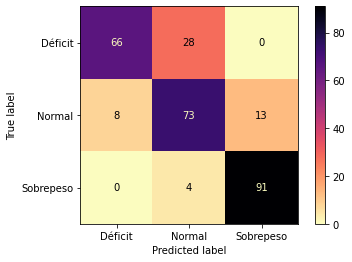

In [58]:
# Mostrar matriz de confusión
ConfusionMatrixDisplay.from_estimator(best_rnn, X_test, y_test, cmap='magma_r')

In [59]:
# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_rnn))

Reporte de Clasificación:
              precision    recall  f1-score   support

     Déficit       0.89      0.70      0.79        94
      Normal       0.70      0.78      0.73        94
   Sobrepeso       0.88      0.96      0.91        95

    accuracy                           0.81       283
   macro avg       0.82      0.81      0.81       283
weighted avg       0.82      0.81      0.81       283



In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcular métricas agregadas (ponderadas)
accuracy_rnn_1 = accuracy_score(y_test, y_pred_rnn)
precision_rnn_1 = precision_score(y_test, y_pred_rnn, average='weighted')
recall_rnn_1 = recall_score(y_test, y_pred_rnn, average='weighted')
f1_rnn_1 = f1_score(y_test, y_pred_rnn, average='weighted')

# Mostrar resultados
print(f" Accuracy: {accuracy_rnn_1:.4f}")
print(f" Precision (ponderada): {precision_rnn_1:.4f}")
print(f" Recall (ponderado): {recall_rnn_1:.4f}")
print(f" F1-score (ponderado): {f1_rnn_1:.4f}")

 Accuracy: 0.8127
 Precision (ponderada): 0.8209
 Recall (ponderado): 0.8127
 F1-score (ponderado): 0.8117


## 2.3 RNN con Keras

### Ajuste de hiperparametos

In [61]:
!pip install keras-tuner --quiet


In [62]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [63]:
# 2. Asegurar tipos correctos
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 3. Codificar y_train, y_test si son textos
# Solo si aún NO están codificados como enteros
if y_train.dtype == 'object' or y_test.dtype == 'object':
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)
else:
    le = None  # Ya estaban codificados

# 4. Convertir tipo a int para clasificación multiclase
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

In [64]:
def build_model(hp):
    model = Sequential()

    # Capas ocultas configurables
    for i in range(hp.Int('n_layers', 1, 3)):
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=16, max_value=128, step=16),
            activation=hp.Choice('activation', ['relu', 'tanh'])
        ))

    # Capa de salida multiclase
    model.add(Dense(3, activation='softmax'))

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.01])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [65]:
tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='keras_tuner_dir',
    project_name='anemia_prediction',
    seed=42
)

# Ejecutar la búsqueda
tuner.search(X_train, y_train,
             validation_split=0.2,
             epochs=50,
             batch_size=32,
             verbose=1)


Trial 10 Complete [00h 00m 39s]
val_accuracy: 0.3495575189590454

Best val_accuracy So Far: 0.8761062026023865
Total elapsed time: 00h 06m 29s


In [66]:
import pandas as pd

# Extraer todos los trials (no solo los mejores)
all_trials = tuner.oracle.trials.values()

# Crear lista con los valores
rows = []
for trial in all_trials:
    row = trial.hyperparameters.values.copy()
    row['val_accuracy'] = trial.score
    rows.append(row)

# Crear DataFrame
results_df = pd.DataFrame(rows)

# Ordenar por accuracy de validación descendente
results_df = results_df.sort_values(by='val_accuracy', ascending=False)

# Mostrar tabla
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
results_df = results_df.dropna(subset=['val_accuracy'])

display(results_df)


,n_layers,units_0,activation,learning_rate,units_1,val_accuracy,units_2
7,2,32,relu,0.010,32,0.876106,112.0
8,1,64,relu,0.001,16,0.814159,64.0
3,1,80,relu,0.001,64,0.796460,128.0
5,3,128,relu,0.001,48,0.725664,112.0
0,2,16,relu,0.001,16,0.685841,NaN
4,2,64,relu,0.001,16,0.628319,96.0
1,3,48,tanh,0.001,64,0.349558,16.0
2,1,128,tanh,0.010,16,0.349558,128.0
6,2,48,tanh,0.010,32,0.349558,48.0
9,3,80,tanh,0.001,32,0.349558,48.0


In [67]:
print("Mejores hiperparámetros encontrados:")
print(tuner.get_best_hyperparameters(1)[0].values)

Mejores hiperparámetros encontrados:
{'n_layers': 2, 'units_0': 32, 'activation': 'relu', 'learning_rate': 0.01, 'units_1': 32, 'units_2': 112}


C:\Users\Geraldine\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\Geraldine\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


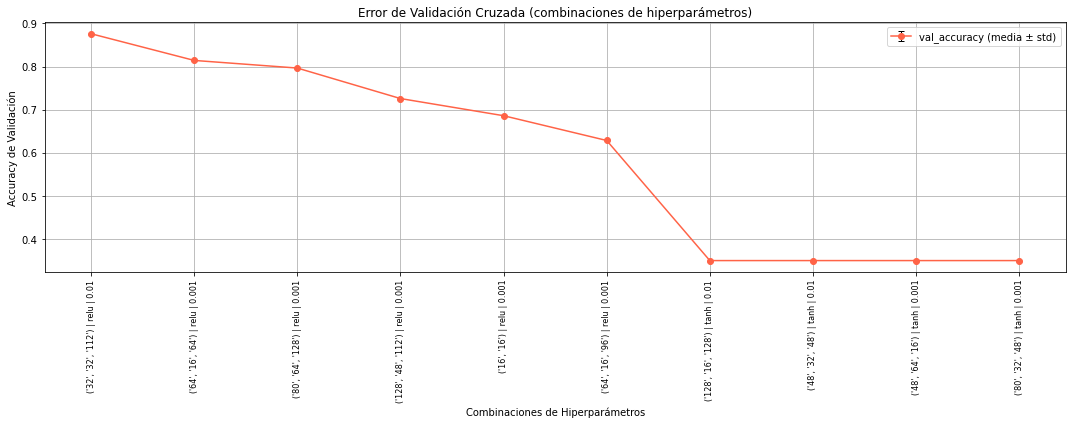

In [68]:
# 1. Formatear etiqueta combinada
def format_label(row):
    capas = []
    for i in range(3):
        key = f'units_{i}'
        if key in row and pd.notnull(row[key]):
            capas.append(str(int(row[key])))
    capa_str = '-'.join(capas) if capas else "ninguna"
    return f"{tuple(capas)} | {row['activation']} | {row['learning_rate']}"

results_df['comb_label'] = results_df.apply(format_label, axis=1)


# 2. Agrupar por combinaciones únicas
grouped = results_df.groupby('comb_label')['val_accuracy'].agg(['mean', 'std']).reset_index()
grouped = grouped.sort_values(by='mean', ascending=False).reset_index(drop=True)
# 3. Plot estilo validación cruzada
plt.figure(figsize=(15, 6))
plt.errorbar(
    x=range(len(grouped)),
    y=grouped['mean'],
    yerr=grouped['std'],
    fmt='o-', color='tomato',
    ecolor='black', elinewidth=1, capsize=3,
    label='val_accuracy (media ± std)'
)

plt.xticks(ticks=range(len(grouped)), labels=grouped['comb_label'], rotation=90, fontsize=8)
plt.xlabel("Combinaciones de Hiperparámetros")
plt.ylabel("Accuracy de Validación")
plt.title("Error de Validación Cruzada (combinaciones de hiperparámetros)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [69]:
print("Mejores hiperparámetros encontrados:")
print(tuner.get_best_hyperparameters(1)[0].values)

Mejores hiperparámetros encontrados:
{'n_layers': 2, 'units_0': 32, 'activation': 'relu', 'learning_rate': 0.01, 'units_1': 32, 'units_2': 112}


In [70]:
best_hp = tuner.get_best_hyperparameters(1)[0]
best_model = tuner.hypermodel.build(best_hp)

history = best_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3628 - loss: 121.5474
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3419 - loss: 34.4093
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3443 - loss: 22.6123
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3413 - loss: 8.9966
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3897 - loss: 3.8265
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3978 - loss: 3.0070
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4210 - loss: 5.2817
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4728 - loss: 2.9328
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4344 - loss: 3.0763
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4593 - loss: 1.8105
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5898 - loss: 0.8357
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.43

In [71]:
y_pred_prob = best_model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)



9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


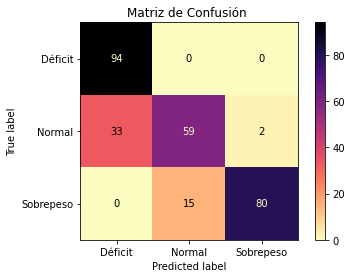

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# 1. Obtener la matriz
cm = confusion_matrix(y_test, y_pred)

# 2. Etiquetas (solo si usaste LabelEncoder)
labels = le.classes_ if le else None

# 3. Mostrar matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='magma_r', values_format='d')
plt.title("Matriz de Confusión ")
plt.show()


In [73]:
# Si tienes LabelEncoder, usamos nombres originales
if le:
    print("Reporte de clasificación:\n", classification_report(y_test, y_pred, target_names=le.classes_))
else:
    print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

print("Accuracy en test:", accuracy_score(y_test, y_pred))

Reporte de clasificación:
               precision    recall  f1-score   support

     Déficit       0.74      1.00      0.85        94
      Normal       0.80      0.63      0.70        94
   Sobrepeso       0.98      0.84      0.90        95

    accuracy                           0.82       283
   macro avg       0.84      0.82      0.82       283
weighted avg       0.84      0.82      0.82       283

Accuracy en test: 0.823321554770318


In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcular métricas agregadas (ponderadas)
accuracy_rnn_2 = accuracy_score(y_test, y_pred)
precision_rnn_2 = precision_score(y_test, y_pred, average='weighted')
recall_rnn_2 = recall_score(y_test, y_pred, average='weighted')
f1_rnn_2 = f1_score(y_test, y_pred, average='weighted')

# Mostrar resultados
print("\nMétricas del Mejor Modelo (KerasTuner):")
print(f" Accuracy: {accuracy_rnn_2:.4f}")
print(f" Precision (ponderada): {precision_rnn_2:.4f}")
print(f" Recall (ponderado): {recall_rnn_2:.4f}")
print(f" F1-score (ponderado): {f1_rnn_2:.4f}")



Métricas del Mejor Modelo (KerasTuner):
 Accuracy: 0.8233
 Precision (ponderada): 0.8382
 Recall (ponderado): 0.8233
 F1-score (ponderado): 0.8193


In [75]:
# Crear DataFrame comparativo
df_comparacion_rn = pd.DataFrame({
    'Modelo': ['RNN MLPClassifier', ' RNN KerasTuner'],
    'Accuracy': [accuracy_rnn_1, accuracy_rnn_2],
    'Precision': [precision_rnn_1, precision_rnn_2],
    'Recall': [recall_rnn_1, recall_rnn_2],
    'F1-Score': [f1_rnn_1, f1_rnn_2]
})

# Mostrar tabla
print("Comparación de redes neuronales:")
from IPython.display import display
display(df_comparacion_rn)

Comparación de redes neuronales:


,Modelo,Accuracy,Precision,Recall,F1-Score
0,RNN MLPClassifier,0.812721,0.820902,0.812721,0.811683
1,RNN KerasTuner,0.823322,0.838176,0.823322,0.819305


In [76]:
import pickle

# Supongamos que este es tu mejor modelo ya entrenado

best_rnn = grid_search_mlp.best_estimator_
pickle.dump(best_rnn, open('mlp_classifier_model.pkl', 'wb'))